## Install packages

In [ ]:
# @title
import pathlib
import shutil
import tempfile

# Manage data and statistics
import numpy as np
from numpy.random import default_rng, SeedSequence
import pandas as pd
from pandas.api.types import CategoricalDtype

from scipy import stats
import scipy.linalg as la
from scipy.stats.mstats import winsorize

# Plot data
from  IPython import display
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
mpl.style.use('tableau-colorblind10')

import seaborn as sns
sns.set_style("white")
sns.set_context("notebook")

# scikit-learn
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut, KFold
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# tensorflow
import tensorflow as tf

import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

print(tf.__version__)

2.15.0


## Read data

In [ ]:
auto = pd.read_csv('https://raw.githubusercontent.com/cbrownley/2022MLWEEK_MLWITHPYTHON/main/data/Auto.csv')

In [ ]:
# SOURCE: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#evaluation-order-matters

auto = auto.copy()

auto['horsepower'] = auto.loc[:, 'horsepower'].replace('?', np.nan)

auto = auto.dropna()

auto['horsepower'] = auto.loc[:, 'horsepower'].astype('int')

auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


## Relationship between `Horsepower` and `MPG`

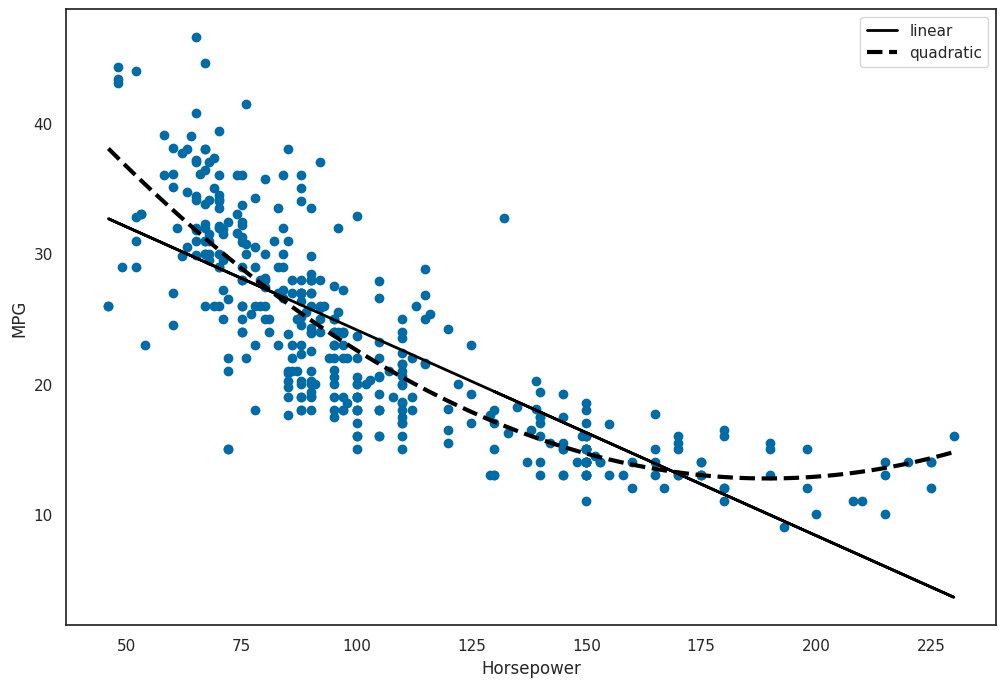

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

m1 = stats.linregress(auto.horsepower, auto.mpg)
m2 = np.poly1d(np.polyfit(auto.horsepower, auto.mpg, 2))
m2line = np.linspace(auto.horsepower.min(), auto.horsepower.max(), 100)

ax.scatter(auto.horsepower, auto.mpg)
plt.plot(auto.horsepower, m1.intercept + m1.slope*auto.horsepower, 'k-', linewidth=2, label='linear')
plt.plot(m2line, m2(m2line), 'k--', linewidth=3, label='quadratic')
ax.set_xlabel('Horsepower')
ax.set_ylabel('MPG')
ax.legend();

## 1. Create train and test datasets

## 1a. Split the `auto` dataset into train and test sets using [`pandas`](https://www.statology.org/pandas-sample-with-replacement/)

## 1b. Split the `auto` dataset into train and test sets using [`scikit-learn`](https://scikit-learn.org/stable/modules/cross_validation.html)

## 2. Create a [dummy regressor](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html) and evaluate its train and test performance

## 3. Fit a [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) and evaluate its test performance with [`cross_val_score`](https://scikit-learn.org/stable/modules/cross_validation.html#computing-cross-validated-metrics)

## 4. Fit a [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) and evaluate its test performance with [`KFold`](https://scikit-learn.org/stable/modules/cross_validation.html#k-fold) cross validation

## 5. Fit a [linear regression](https://colab.research.google.com/drive/13DNNjirwusTw_hh8eAnMGm8LDGSgaKZx?usp=sharing) with [`Keras`](https://www.tensorflow.org/tutorials/keras/regression#linear_regression_with_one_variable) and evaluate its test performance